In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Important parameters from sklearn.SVM.SVC Documentation
# C - value of penalty from loss term in Soft-SVM equation
# Kernel also can be changed as - poly, linear, RBF, sigmoid or precomputed
# degree - param is useful only if the kernel is selected as poly
# Gamma- is nothing but (1/Sigma) as per the notes in the class, here its noted as Gamma
## Gamma = auto will chosse the best parameter
# Tolerance means when going from ith to i+1th term, then if the difference is not much varying
## then just ignore it and take the current value and stop the approximation further
# class weight - term if we give in case of imbalanced data, then it will try to give respective
## classweights while computation
# random state will give same data everytime when run the code

In [8]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

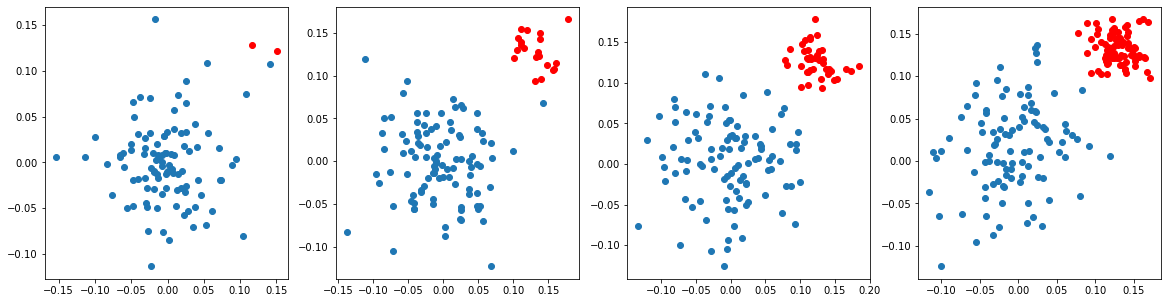

In [9]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2)) # (mean,sigma,shape and size)
    # Creating 2d array to easy the process of plotting the points in the graph X vs Y
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    ## input features # on vstacking data will be appended down to 1st one
    X=np.vstack((X_p,X_n))
    ## output labels # on vstacking data will be appended down to 1st one
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

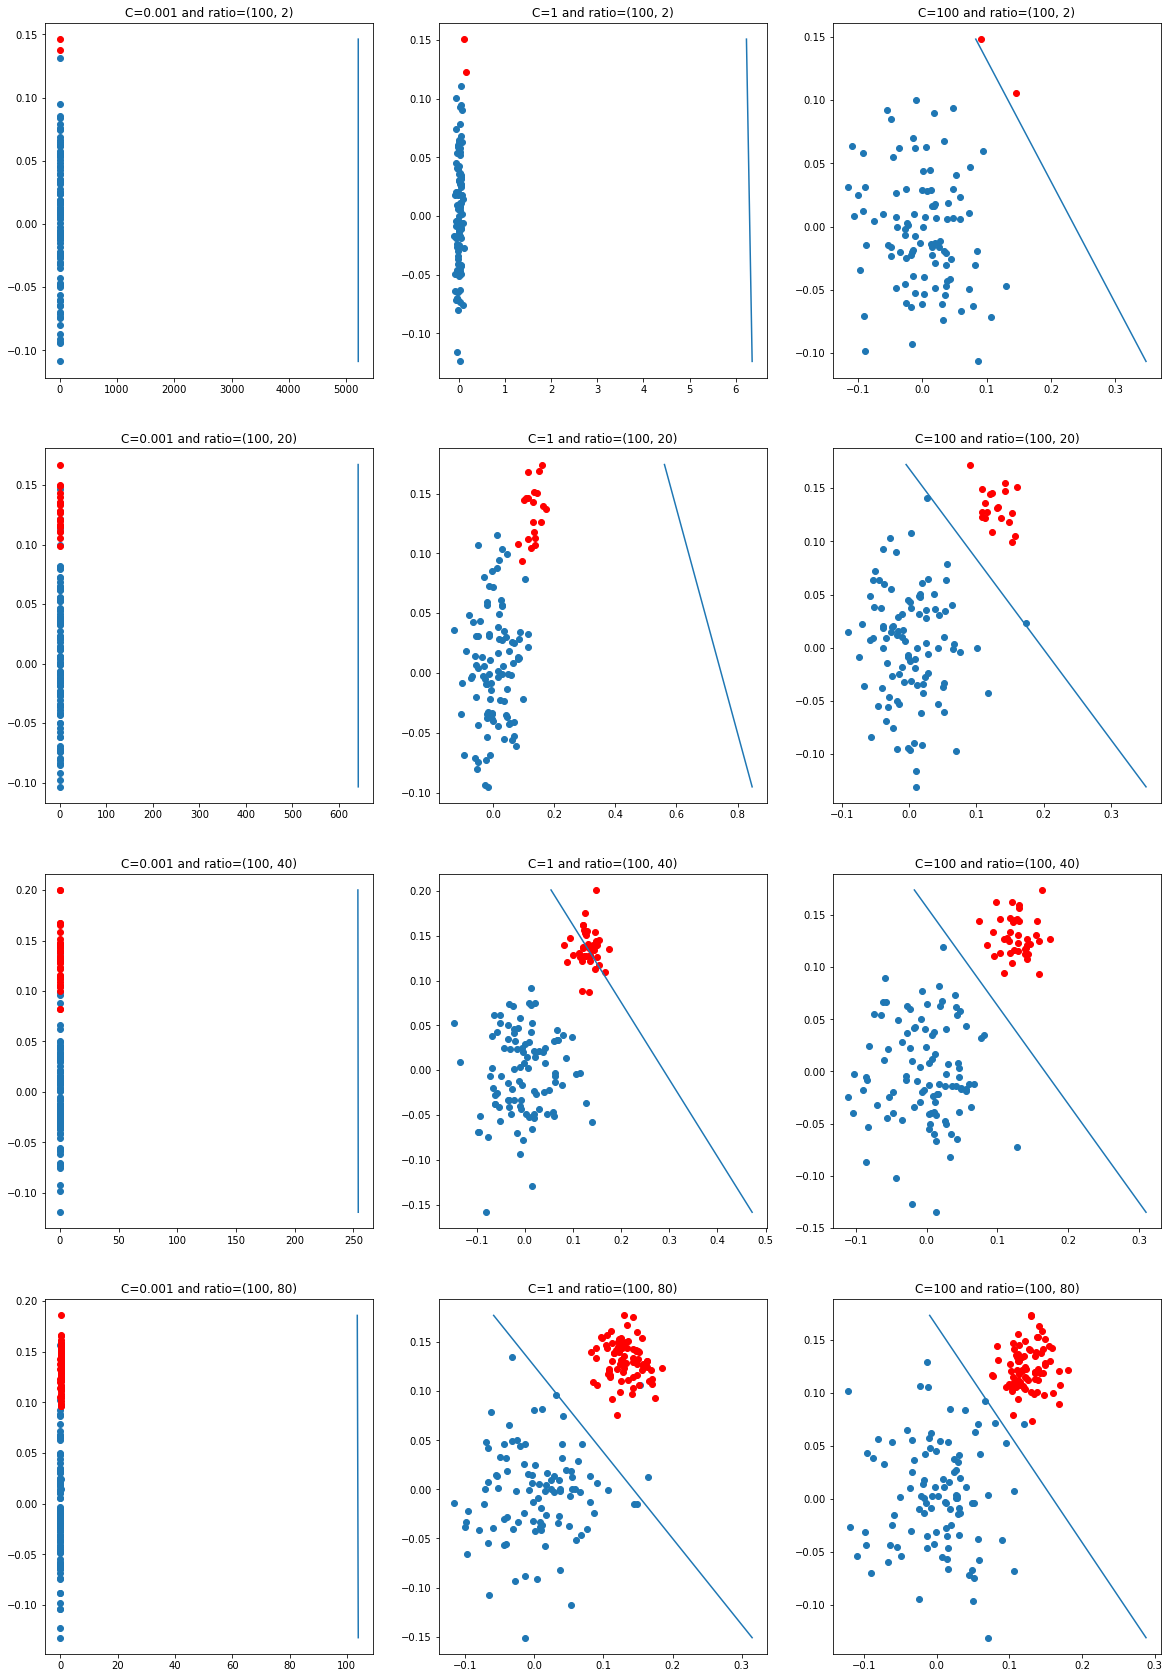

In [10]:
# Implementing SVM for different values of regularization parameters
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,30))
Ci = [0.001,1,100]
count=1
for j,i in enumerate(ratios):
    for k in Ci:
        plt.subplot(4,3,count)
        count+=1
        X_p=np.random.normal(0,0.05,size=(i[0],2)) # (mean,sigma,shape and size)
        # Creating 2d array to easy the process of plotting the points in the graph X vs Y
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        ## input features # on vstacking data will be appended down to 1st one
        X=np.vstack((X_p,X_n))
        ## output labels # on vstacking data will be appended down to 1st one
        y=np.vstack((y_p,y_n))
        clf = SVC(C=k, kernel='linear',gamma='auto')
        clf.fit(X, y)
        plt.title(f"C={k} and ratio={i}")
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        ## coeficients will be considered like in eqn = w0x0+w1x1 => we will get w0, w1
        draw_line(clf.coef_[0],clf.intercept_,min(X[:,1]),max(X[:,1]))
plt.show()

**Observations:**<br>
*1.At lower value of C=0.001, what ever the ratio of the data, its unable to classify the points as the loss term is becoming almost zero and completely depending on regularisation term causing to make simple(underfitted models)*<br>
*2.At C=1, also its behaving like C=0.001 case only but when the data is tending to be balanced then the points are sufficiently classified as it have enough data points to draw a good hyper plane*<br>
*3.At C=100, it may overfit even if the data is necessarily balanced or not as the loss term will get adjusted to the data points and gives the importance to loss term more*<br>
*4.One key difference here in SVM compared to LR is that, here even if C=100 and highly imbalanced the points are classified correctly because of the support vectors and plane will be drawn by giving importance to loss term and will be able to classify the points*

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

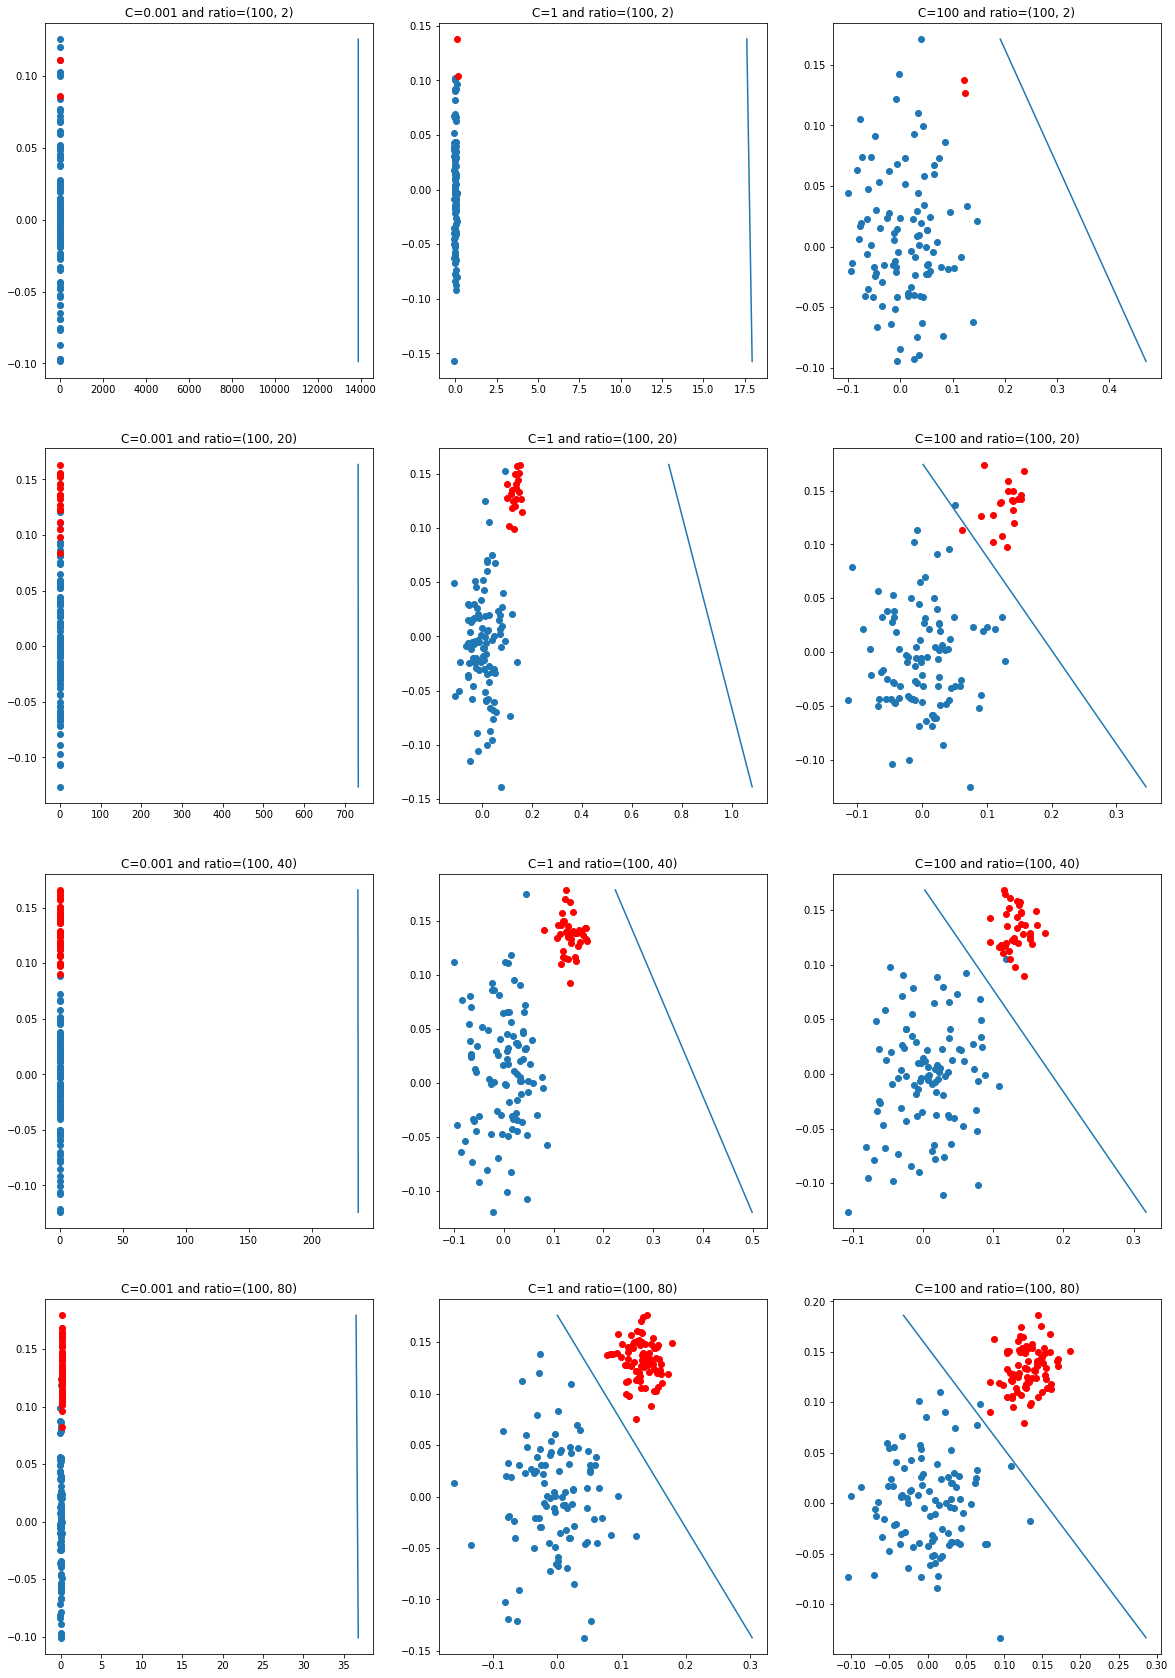

In [11]:
#you can start writing code here.
# Implementing Logistic Regression for different values of regularization parameters
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,30))
Ci = [0.001,1,100]
count=0
for j,i in enumerate(ratios):
    for k in Ci:
        count+=1
        plt.subplot(4,3,count)
        X_p=np.random.normal(0,0.05,size=(i[0],2)) # (mean,sigma,shape and size)
        # Creating 2d array to easy the process of plotting the points in the graph X vs Y
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        ## input features # on vstacking data will be appended down to 1st one
        X=np.vstack((X_p,X_n))
        ## output labels # on vstacking data will be appended down to 1st one
        y=np.vstack((y_p,y_n))
        clf = LogisticRegression(C=k)
        clf.fit(X, y)
        plt.title(f"C={k} and ratio={i}")
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        draw_line(clf.coef_[0],clf.intercept_,min(X[:,1]),max(X[:,1]))
plt.show()

**Observations:**
<br>
*1. At any ratio of imbalanced data, **if C value is very small**(lambda is high as per theory in class lecture) then its completely underfitting(ignoring the loss term and not bothering about the training data set)*
<br>
*2. Also, when the data set is highly imbalanced i.e, in the case **100:2** scenario for any value of C, model is unable to differentiate and giving a underfitted model by assuming all the points are positive*
<br>
*3. So as the imbalancity in the data keep on decreasing and when approaching to **100:20,100:40**, the linear seperable line is tending to seperate the points correctly at reasonable value of C*
<br>
*4. At **C=100 & ratio = 100:40**, model is able to classify the points correctly without any errors*
<br>
*5. At **C=1 & 100 the ratio of +ve and -ve data almost to be equal(100:80)**, model is able to predict correctly and draw a hyperplane that seperates positive and negative points*